In [ ]:
#!pip install torch

Install tabnet

In [ ]:
#!pip install pytorch-tabnet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/My Drive/Credit Research Project/"

/content/drive/My Drive/Credit Research Project


In [ ]:
import pandas as pd
import numpy as np
import torch

In [ ]:
#price_hist = pd.read_csv("price_history.csv")
company_info = pd.read_csv("company_info.csv")
#financials =pd.read_csv("Q_financials_info.csv")
cash_flow=pd.read_csv("Q_cash_flow_info.csv")
blancesheet=pd.read_csv("Q_bs_info.csv")
incomestate=pd.read_csv("Q_is_info.csv")

<ipython-input-6-a59b26948e08>:2: DtypeWarning: Columns (14,16,24,60,84,94,99,100,101,102,110,134,135) have mixed types. Specify dtype option on import or set low_memory=False.
  company_info = pd.read_csv("company_info.csv")


In [ ]:
agg_company_data = pd.concat([cash_flow,blancesheet,incomestate])
agg_company_data.columns = ["field"] + list(agg_company_data.columns[1:])

In [ ]:
agg_company_data.head()

,field,2024Q3,2024Q2,2024Q1,2023Q4,2023Q3,2023Q2,2023Q1,ticker,2024Q4
0,Free Cash Flow,2.390300e+10,2.670700e+10,2.069400e+10,3.750300e+10,1.943500e+10,NaN,NaN,AAPL,NaN
1,Repurchase Of Capital Stock,-2.508300e+10,-2.652200e+10,-2.320500e+10,-2.013900e+10,-2.100300e+10,NaN,NaN,AAPL,NaN
2,Repayment Of Debt,4.270000e+08,-3.253000e+09,-3.148000e+09,-3.984000e+09,0.000000e+00,NaN,NaN,AAPL,NaN
3,Issuance Of Debt,0.000000e+00,NaN,NaN,NaN,0.000000e+00,NaN,NaN,AAPL,NaN
4,Capital Expenditure,-2.908000e+09,-2.151000e+09,-1.996000e+09,-2.392000e+09,-2.163000e+09,NaN,NaN,AAPL,NaN


In [ ]:
agg_company_data.groupby("ticker").apply(lambda x: x.shape[0])

<ipython-input-9-da1c6ed0b9df>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg_company_data.groupby("ticker").apply(lambda x: x.shape[0])


,0
ticker,
A,119
AAPL,155
ABBV,172
ABEV,157
ABNB,159
...,...
ZBRA,132
ZM,122
ZS,108


<ipython-input-10-18d6bfd4e317>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  field_count = agg_company_data.groupby("field").apply(lambda x: x.shape[0]).sort_values(ascending=False)


<Axes: xlabel='field'>

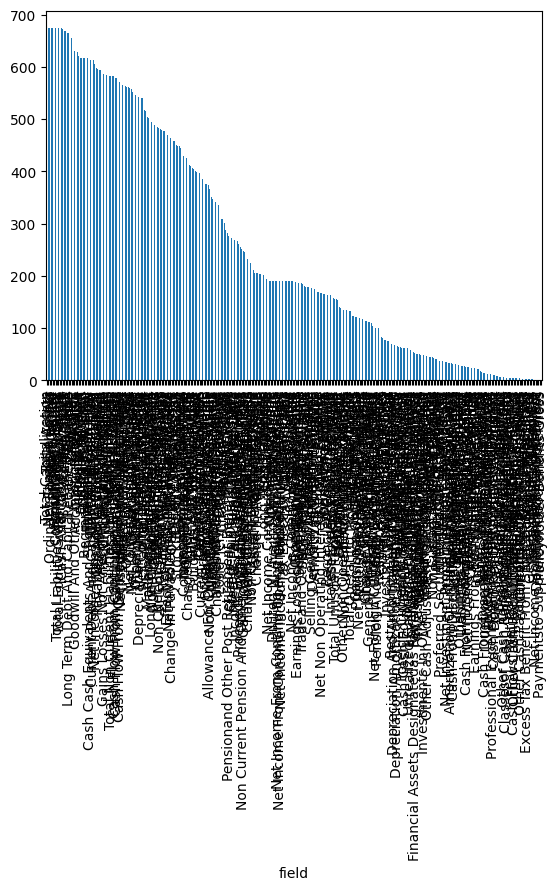

In [ ]:
field_count = agg_company_data.groupby("field").apply(lambda x: x.shape[0]).sort_values(ascending=False)
field_count.plot.bar()

In [ ]:
fields_to_use = (field_count > 150).index
fields_to_use

Index(['Total Capitalization', 'Total Assets', 'Net Tangible Assets',
       'Ordinary Shares Number', 'Invested Capital', 'Share Issued',
       'Stockholders Equity', 'Common Stock Equity',
       'Total Liabilities Net Minority Interest',
       'Total Equity Gross Minority Interest',
       ...
       'Net Income Extraordinary', 'Interest Paid Direct',
       'General Partnership Capital', 'Receiptsfrom Customers',
       'Dividend Paid Cfo', 'Net Income From Tax Loss Carryforward',
       'Interest Received Direct', 'Depletion Income Statement',
       'Paymentsto Suppliersfor Goodsand Services',
       'Policyholder Benefits Gross'],
      dtype='object', name='field', length=341)

In [ ]:
agg_company_data_filter = agg_company_data[agg_company_data["field"].isin(fields_to_use)]
drop_tickers = ["BAC","JPM","UBS","RY","TD","WFC"]
agg_company_data_filter = agg_company_data_filter[~agg_company_data_filter["ticker"].isin(drop_tickers)]

In [ ]:
agg_company_data_filter.groupby("ticker").apply(lambda x: x.shape[0])

<ipython-input-13-f4bcbaf85c86>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg_company_data_filter.groupby("ticker").apply(lambda x: x.shape[0])


,0
ticker,
A,119
AAPL,155
ABBV,172
ABEV,157
ABNB,159
...,...
ZBRA,132
ZM,122
ZS,108


**Credit Risk Assessment**

Develop a classification model (e.g., Logistic Regression, SVM, Neural Networks) to assess the credit risk of these companies based on their debt repayment history, debt-to-equity ratio, and other relevant financial metrics.
Use metrics like accuracy, precision, and recall to evaluate the model's performance.


**Clustering Companies Based on Financial Profiles**

Use clustering algorithms (e.g., K-Means, Hierarchical Clustering) to group these companies based on their financial profiles, including metrics like free cash flow, capital expenditures, and dividend payments.
Interpret the clusters to understand similarities and differences in their financial strategies.

**Feature Importance Analysis**

Train a model (e.g., Random Forest, Gradient Boosting) to predict a key financial metric (e.g., free cash flow) and use feature importance to identify which financial metrics are most influential.
Compare the feature importance across different companies to understand their unique financial drivers.

In [ ]:
#unspervised machine learning techniques
#K means, heirachial
#PCA
#DBscan
#umap
#tabnet
agg_company_data_filter.to_csv("agg_company_data_filter.csv",index=False)

In [ ]:
data = agg_company_data_filter.pivot_table(index="ticker",columns="field",values="2024Q3")

In [ ]:
data = data.fillna(0)
data.shape[0]

604

In [ ]:
#Train_data_pca = data.iloc[:302,:]
#Test_data_keam = data.iloc[303:,:]

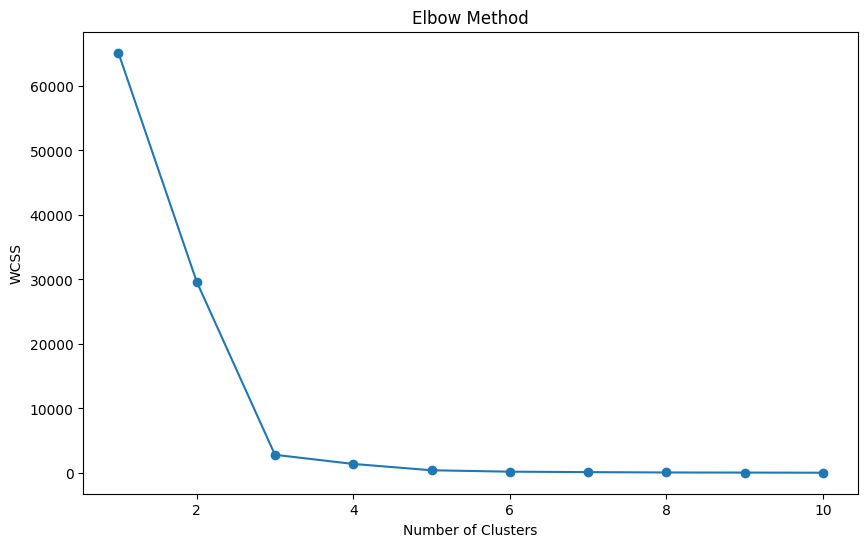

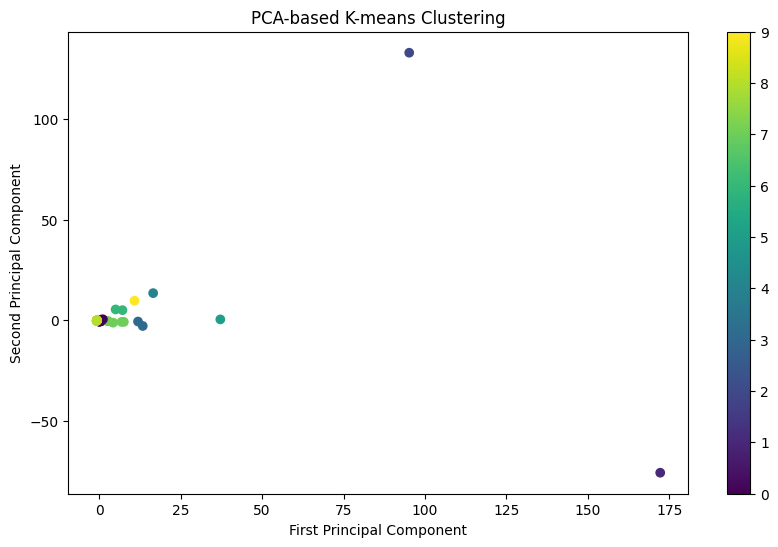

        PC1       PC2  cluster
0 -0.727595 -0.136687        8
1 -0.161414 -0.237219        0
2 -0.584882 -0.112344        8
3 -0.286091  0.065760        0
4 -0.717079 -0.134642        8


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your dataset (replace this with your actual data loading)
# For this example, we'll use a dummy dataset
#data = np.random.rand(100, 10)  # 100 samples, 10 features

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components
pca_result = pca.fit_transform(data_scaled)

# Determine optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters (let's say it's 3 for this example)
optimal_clusters = 10

# Apply K-means clustering on PCA results
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_result)

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA-based K-means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

# Create a DataFrame with PCA results and cluster labels
result_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
result_df['cluster'] = cluster_labels
data["cluster_pca"] = cluster_labels

print(result_df.head())

In [ ]:
print(data.groupby("cluster_pca").apply(lambda x: x.shape[0]))
data[data["cluster_pca"]==1]

cluster_pca
0     29
1      1
2      1
3      2
4      1
5      1
6      2
7      5
8    561
9      1
dtype: int64


<ipython-input-19-2760beaa6b15>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(data.groupby("cluster_pca").apply(lambda x: x.shape[0]))


field,Accounts Payable,Accounts Receivable,Accrued Interest Receivable,Accumulated Depreciation,Additional Paid In Capital,Allowance For Doubtful Accounts Receivable,Amortization,Amortization Cash Flow,Amortization Of Intangibles,Amortization Of Intangibles Income Statement,...,Tradeand Other Payables Non Current,Trading Securities,Treasury Shares Number,Treasury Stock,Unrealized Gain Loss,Unrealized Gain Loss On Investment Securities,Work In Process,Working Capital,Write Off,cluster_pca
ticker,,,,,,,,,,,,,,,,,,,,,
TLK,1.438100e+13,1.257000e+13,0.0,-2.061070e+14,2.711000e+12,-8.094000e+12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.260900e+13,0.0,1


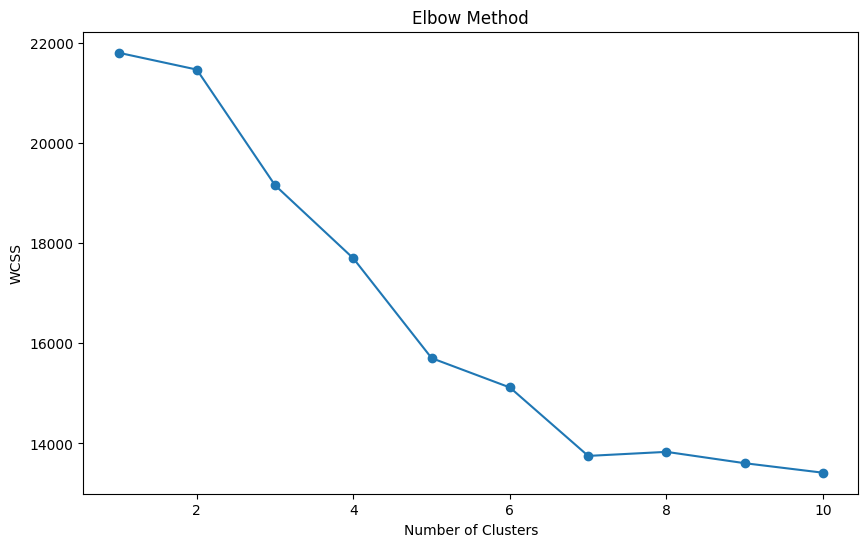

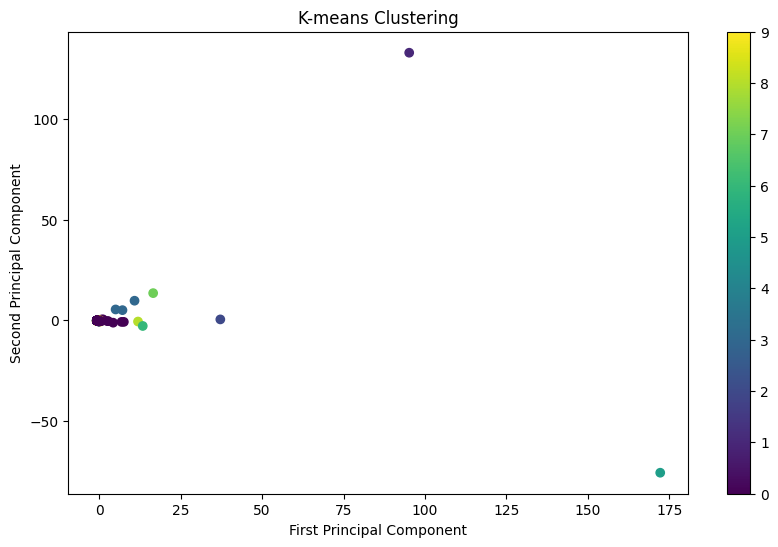

In [ ]:
# prompt: give me a code to perform k mean clustering into 2 groups in agg_company_data_filter

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming agg_company_data_filter is your DataFrame
# Select relevant numerical features for clustering
features = data.iloc[:,:-1].select_dtypes(include=np.number)


# Handle missing values (replace with mean, median, or other appropriate method)
features = features.fillna(features.mean())

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = np.sqrt(np.abs(scaled_features))*np.sign(scaled_features)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()



# Perform K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
data['cluster_kmean'] = kmeans.fit_predict(scaled_features)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['cluster_kmean'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

# Analyze the clusters
# ... (e.g., calculate cluster means, visualize clusters)

In [ ]:
print(data.groupby("cluster_kmean").apply(lambda x: x.shape[0]))
data[data["cluster_kmean"]==3]

cluster_kmean
0    482
1      1
2      1
3      3
4    103
5      1
6      1
7      1
8      1
9     10
dtype: int64


<ipython-input-21-f1061a6ad89b>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(data.groupby("cluster_kmean").apply(lambda x: x.shape[0]))


field,Accounts Payable,Accounts Receivable,Accrued Interest Receivable,Accumulated Depreciation,Additional Paid In Capital,Allowance For Doubtful Accounts Receivable,Amortization,Amortization Cash Flow,Amortization Of Intangibles,Amortization Of Intangibles Income Statement,...,Trading Securities,Treasury Shares Number,Treasury Stock,Unrealized Gain Loss,Unrealized Gain Loss On Investment Securities,Work In Process,Working Capital,Write Off,cluster_pca,cluster_kmean
ticker,,,,,,,,,,,,,,,,,,,,,
MFG,0.0,0.0,0.0,0.0,1.129730e+12,0.0,0.0,0.0,0.0,0.0,...,2.156780e+13,4291043.0,9.539000e+09,0.000000e+00,0.0,0.0,0.0,0.0,6,3
MUFG,0.0,0.0,0.0,0.0,7.680500e+10,0.0,0.0,0.0,0.0,0.0,...,2.249300e+13,672444452.0,7.229170e+11,1.355220e+12,0.0,0.0,0.0,0.0,9,3
SMFG,0.0,0.0,0.0,0.0,6.118330e+11,0.0,0.0,0.0,0.0,0.0,...,1.061440e+13,10672350.0,3.410100e+10,0.000000e+00,0.0,0.0,0.0,0.0,6,3


In [ ]:
data.columns

Index(['Accounts Payable', 'Accounts Receivable',
       'Accrued Interest Receivable', 'Accumulated Depreciation',
       'Additional Paid In Capital',
       'Allowance For Doubtful Accounts Receivable', 'Amortization',
       'Amortization Cash Flow', 'Amortization Of Intangibles',
       'Amortization Of Intangibles Income Statement',
       ...
       'Trading Securities', 'Treasury Shares Number', 'Treasury Stock',
       'Unrealized Gain Loss', 'Unrealized Gain Loss On Investment Securities',
       'Work In Process', 'Working Capital', 'Write Off', 'cluster_pca',
       'cluster_kmean'],
      dtype='object', name='field', length=340)

In [ ]:
# prompt: give me code to random forest classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in a pandas DataFrame called 'df'
# Replace 'target_variable' with the name of your target variable column
# Replace 'features' with a list of the names of your feature columns
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(data.iloc[:302,:-2])
y_train_pca = data.iloc[:302,-2]
y_train_kmean = data.iloc[:302,-1]

X_test = scaler.fit_transform(data.iloc[303:,:-2])
y_test_pca = data.iloc[303:,-2]
y_test_kmean = data.iloc[303:,-1]
# Create a Random Forest classifier

model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

# Train the model
model.fit(X_train, y_train_pca)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test_pca, y_pred)
print(f"Accuracy: {accuracy}")
print(pd.DataFrame(y_pred).groupby(0).apply(lambda x: x.shape[0]))

Accuracy: 0.920265780730897
0
0      4
8    297
dtype: int64


<ipython-input-35-e77d294c2588>:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(pd.DataFrame(y_pred).groupby(0).apply(lambda x: x.shape[0]))


In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

# Train the model
model.fit(X_test, y_test_kmean)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test_kmean, y_pred)
print(f"Accuracy: {accuracy}")
print(pd.DataFrame(y_pred).groupby(0).apply(lambda x: x.shape[0]))

Accuracy: 1.0
0
0    239
1      1
2      1
3      3
4     49
5      1
6      1
7      1
9      5
dtype: int64


<ipython-input-36-599e535ec82f>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(pd.DataFrame(y_pred).groupby(0).apply(lambda x: x.shape[0]))
